In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [320]:
df=pd.read_csv("Downloads/housing.csv")

In [321]:
data=df.iloc[:,:2]

In [322]:
data

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85
...,...,...
20635,-121.09,39.48
20636,-121.21,39.49
20637,-121.22,39.43
20638,-121.32,39.43


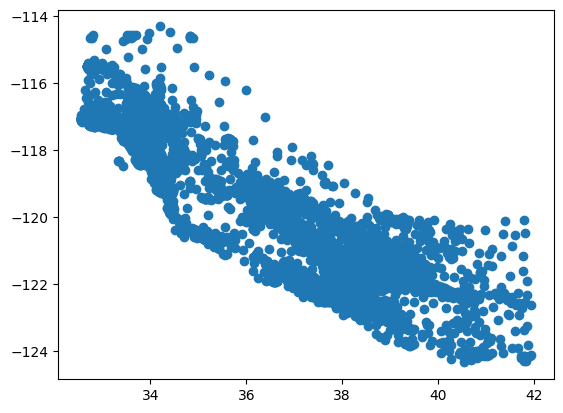

In [13]:
plt.scatter(data["latitude"],data["longitude"])

In [324]:
data.shape

(20640, 2)

m=2
k=4
u=np.random.rand(data.shape[0],k)
np.sum(u,axis=1)[:,np.newaxis]
#u/=np.sum(u,axis=1)[:,np.newaxis]

In [327]:
u

array([[0.29517377, 0.29915115, 0.03047438, 0.3752007 ],
       [0.1830099 , 0.26624264, 0.25604771, 0.29469975],
       [0.18995334, 0.18160159, 0.44454426, 0.18390082],
       ...,
       [0.01458189, 0.46856124, 0.07468052, 0.44217636],
       [0.28065772, 0.16963417, 0.20318957, 0.34651854],
       [0.36846257, 0.07118209, 0.26553006, 0.29482529]])

In [336]:
k=5

In [337]:
u=np.random.rand(data.shape[0],5)
u/=np.sum(u,axis=1)[:,np.newaxis]

In [338]:
u

array([[0.15159156, 0.48248204, 0.05923556, 0.01591668, 0.29077416],
       [0.32668244, 0.15446032, 0.0232058 , 0.26384826, 0.23180318],
       [0.00528384, 0.09678326, 0.28015916, 0.32431007, 0.29346367],
       ...,
       [0.1988401 , 0.27867297, 0.22146505, 0.27245168, 0.02857021],
       [0.15906039, 0.10060816, 0.12230819, 0.28558235, 0.33244091],
       [0.30778213, 0.26089153, 0.09806503, 0.06495223, 0.26830908]])

In [347]:
def calculate_centroid(data,k,u,m):
    centroids=np.zeros((k,data.shape[1]))
    #print(data)
    for i in range(k):        
        centroids[i,:]=np.sum((u[:,i]**m)[:,np.newaxis]*data.values,axis=0)/np.sum(u[:,i]**m)
    print(centroids)
    return centroids
        

In [348]:
def cal_membership(data,centroids,k,m):
    u_new=np.zeros((data.shape[0],k))
    #print(centroids)
    for i in range(k):
        u_new[:,i]=np.linalg.norm(data.values-centroids[i,:],axis=1)
    #u_new=(1/u_new**2)*(np.sum((1/u_new)**2,axis=1)[:,np.newaxis])
    u_new=1/ (u_new ** 2 * np.sum((1/u_new) ** 2 , axis=1 )[:,np.newaxis] )
        #u_new=1/ (u_new ** (2/(m-1)) * np.sum((1/u_new) ** (2/(m-1)) , axis=1 )[:,np.newaxis] )

    #print(u_new)
    return u_new


In [349]:
for i in range(100):
    centroids = calculate_centroid(data,5,u,2)
    u_new=cal_membership(data,centroids,5,2)
    if np.linalg.norm(u_new-u)<=0.00001:
        break
    u=u_new
labels=np.argmax(u,axis=1)

[[-122.13849614   37.70361498]
 [-117.08394583   33.07619821]
 [-121.52119698   38.86051527]
 [-119.72801195   36.43931137]
 [-118.17779383   34.01576941]]


<Axes: >

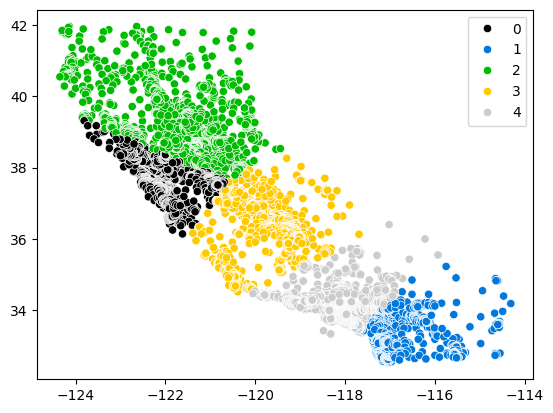

In [346]:
sns.scatterplot(data=data, x=data.values[:,0],y=data.values[:,1], hue=labels, palette='nipy_spectral')